The objective of this project is to analyze the year-over-year (YoY) growth of revenue for major companies using historical financial data spanning from 2009 to 2023. The dataset includes key financial metrics such as revenue, market cap, net income, and earnings per share, among others. By performing a growth analysis, we aim to identify trends and patterns in the performance of various companies, with a particular focus on understanding which companies have experienced the highest and lowest revenue growth over time.

We will employ data manipulation techniques using Pandas to clean, preprocess, and analyze the dataset. Key steps include handling missing values, removing irrelevant data, and calculating the YoY growth rate for each company. We will visualize the results using various graphical representations, such as line graphs and bar charts, to provide a clear view of the performance of these companies over the period analyzed. The final goal is to draw conclusions that will provide insights into which companies are thriving in terms of revenue growth and which ones are facing challenges.

# Data Import and Cleanup

In [169]:
import numpy as np
import pandas as pd
import warnings



# Suppress specific warnings related to formatting
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset from the given path
df = pd.read_csv('/kaggle/input/financial-statements-of-major-companies2009-2023/Financial Statements.csv')

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for any non-numeric values in the Revenue column
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Forward fill missing values in Revenue column
df['Revenue'] = df['Revenue'].ffill()

# Sort the data by Company and Year to ensure proper calculation
df.sort_values(by=['Company', 'Year'], inplace=True)

# Calculate Year-over-Year (YoY) growth for Revenue (Revenue change compared to previous year)
df['YoY Growth'] = df.groupby('Company')['Revenue'].pct_change() * 100

# Replace infinite values with NaN and forward fill any NaN values in Revenue
df['Revenue'] = df['Revenue'].replace(np.inf, np.nan)
df['Revenue'] = df['Revenue'].ffill()

# Display the data with the new YoY Growth column
print(df[['Company', 'Year', 'Revenue', 'YoY Growth']].head())


   Company  Year   Revenue  YoY Growth
13    AAPL  2009   42905.0         NaN
12    AAPL  2010   65225.0   52.021909
11    AAPL  2011  108249.0   65.962438
10    AAPL  2012  156508.0   44.581474
9     AAPL  2013  170910.0    9.202086


# Sorting and Year-over-Year Growth Calculation

In [170]:
# Summarize the YoY Growth analysis for each company
summary = df.groupby('Company')['YoY Growth'].describe()

# Display the summary
print(summary)


         count       mean        std        min        25%        50%  \
Company                                                                 
AAPL      13.0  20.425742  22.514338  -7.734206   6.304518   9.202086   
AIG       13.0  -1.810035   9.433507 -12.081373  -9.438562  -4.303312   
AMZN      13.0  26.678023   9.090052   9.399517  20.454126  27.073237   
BCS       13.0  -2.653405   8.412549 -25.300186  -5.792806  -2.092808   
GOOG      13.0  21.261709   7.917338   9.780816  18.300090  20.591238   
INTC      13.0   5.196116  11.442632 -20.209050  -0.921783   5.681378   
MCD       13.0   0.473809   8.646413 -10.094363  -6.846944  -0.173536   
MSFT      14.0   9.774863   5.636176  -2.592434   6.177525   9.655188   
NVDA      14.0  17.646821  21.930538  -6.811198   1.797047   9.944893   
PCG       13.0   3.866255   4.631603  -3.005774   0.561647   3.710106   
PYPL       8.0  16.713434   3.962832   8.462418  15.185327  17.618385   
SHLDQ      9.0 -10.499115   7.781008 -24.555064 -13

In [171]:
# Replace all positive and negative infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [172]:
# Use the forward fill method directly to fill missing values
df.ffill(inplace=True)


In [173]:
# Make sure the 'Revenue' column is of numeric type
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')


In [174]:
# Sort the data by Company and Year to ensure proper calculation
df.sort_values(by=['Company', 'Year'], inplace=True)

# Calculate Year-over-Year (YoY) growth for Revenue (Revenue change compared to previous year)
df['YoY Growth'] = df.groupby('Company')['Revenue'].pct_change() * 100

# Display the data with the new YoY Growth column
print(df[['Company', 'Year', 'Revenue', 'YoY Growth']])


   Company  Year   Revenue  YoY Growth
13    AAPL  2009   42905.0         NaN
12    AAPL  2010   65225.0   52.021909
11    AAPL  2011  108249.0   65.962438
10    AAPL  2012  156508.0   44.581474
9     AAPL  2013  170910.0    9.202086
..     ...   ...       ...         ...
84   SHLDQ  2014   36188.0   -9.198575
83   SHLDQ  2015   31198.0  -13.789101
82   SHLDQ  2016   25146.0  -19.398679
81   SHLDQ  2017   22138.0  -11.962141
80   SHLDQ  2018   16702.0  -24.555064

[161 rows x 4 columns]


# Graphing the Data

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

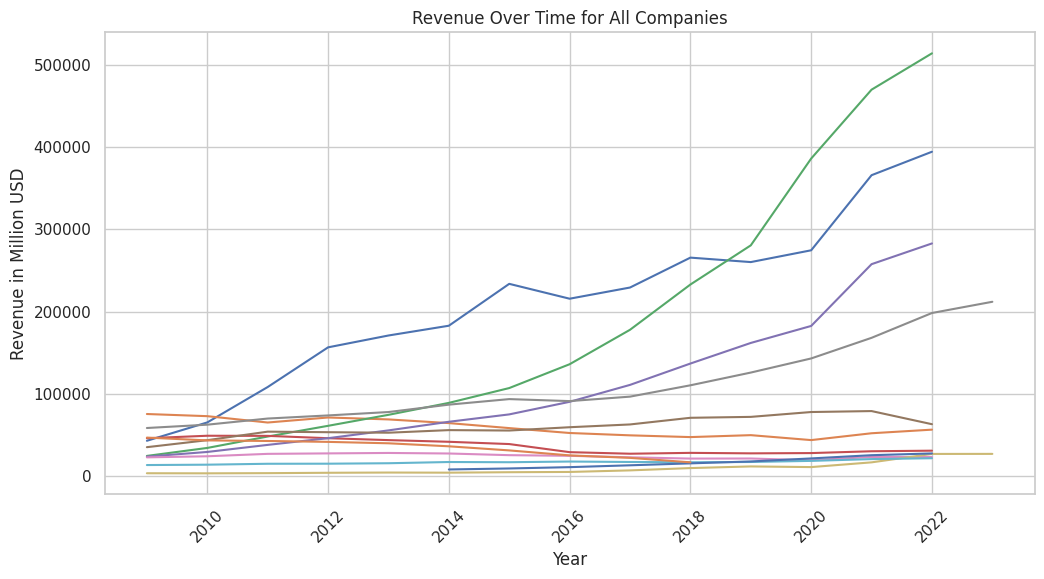

In [175]:
import matplotlib.pyplot as plt

# Ensure 'Year' and 'Revenue' are numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Fill any missing values in 'Revenue' using forward fill
df['Revenue'] = df['Revenue'].ffill()

# Remove rows where 'Year' or 'Revenue' are still NaN
df = df.dropna(subset=['Year', 'Revenue'])

# Create a plot
plt.figure(figsize=(12, 6))

# Loop through each unique company and plot their revenue over time
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Revenue'], label=company)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Revenue in Million USD')
plt.title('Revenue Over Time for All Companies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



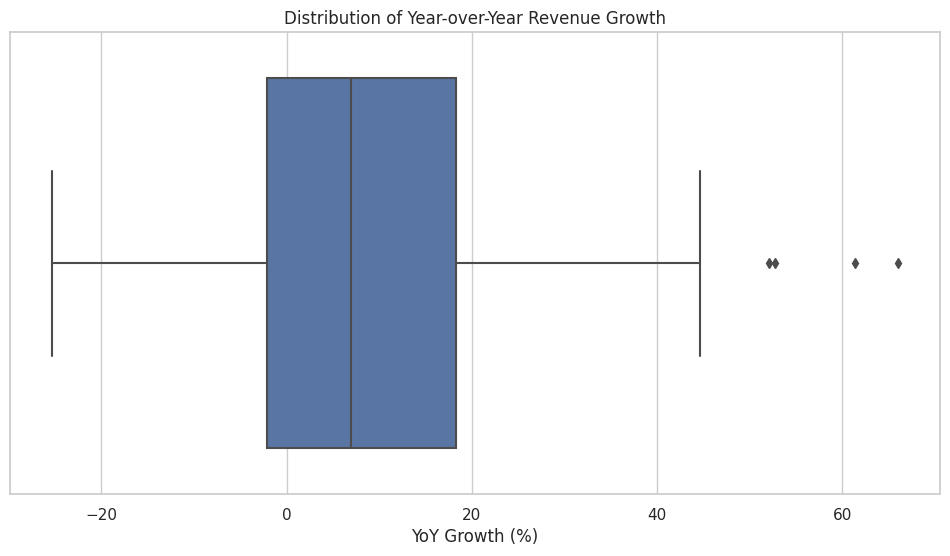

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='YoY Growth')
plt.title('Distribution of Year-over-Year Revenue Growth')
plt.xlabel('YoY Growth (%)')
plt.show()


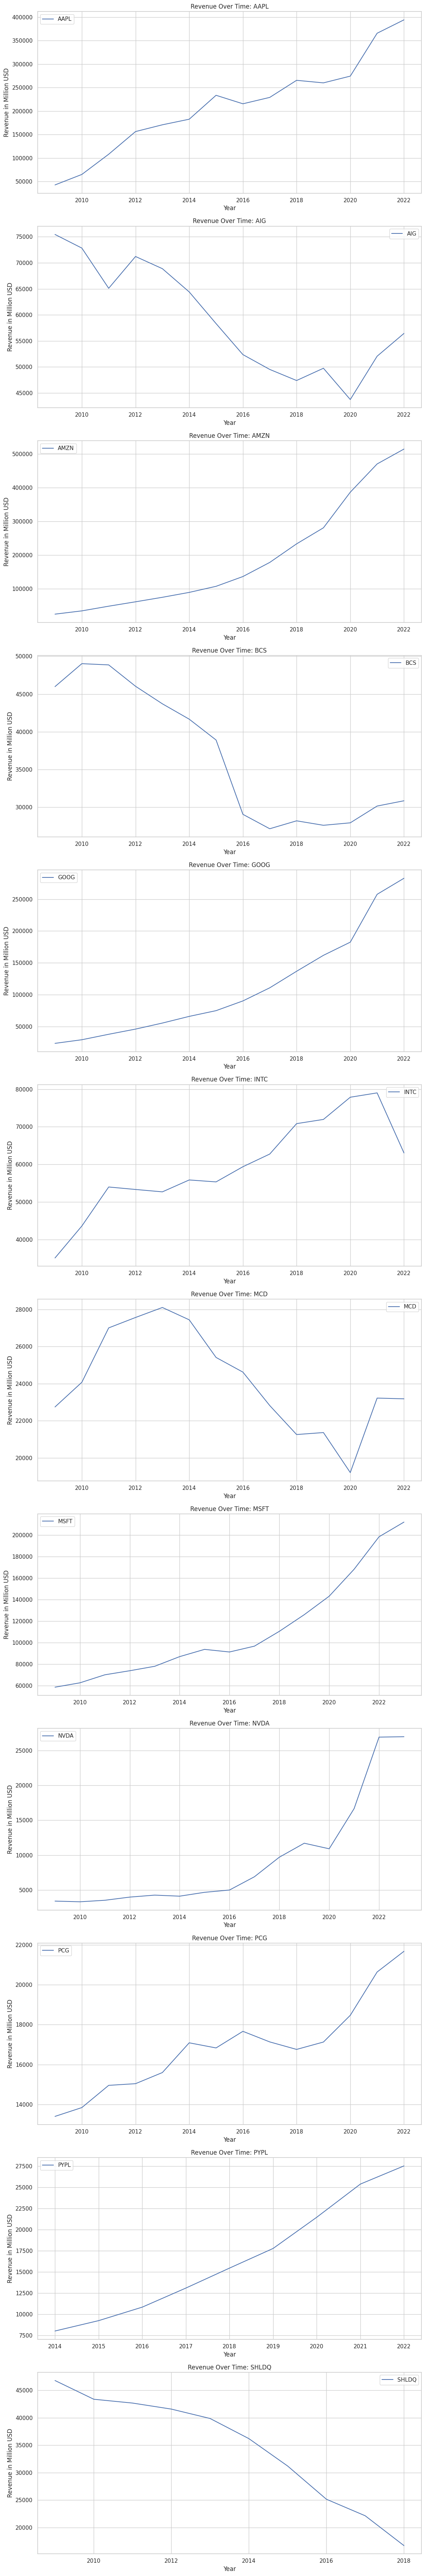

In [177]:
unique_companies = df['Company'].unique()
n = len(unique_companies)  # Number of subplots based on the number of companies
fig, axes = plt.subplots(n, 1, figsize=(12, 6 * n))

if n == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one subplot

for i, company in enumerate(unique_companies):
    company_data = df[df['Company'] == company]
    axes[i].plot(company_data['Year'], company_data['Revenue'], label=company)
    axes[i].set_title(f'Revenue Over Time: {company}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Revenue in Million USD')
    axes[i].legend(loc='best')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# Growth and Correlation 

In [178]:
# Calculate the average YoY Growth for each company
average_growth = df.groupby('Company')['YoY Growth'].mean()

# Sort the companies by average growth
sorted_growth = average_growth.sort_values(ascending=False)

# Display the top and bottom 5 companies by average YoY Growth
print("Top 5 Companies with Highest Growth:")
print(sorted_growth.head())

print("\nBottom 5 Companies with Lowest Growth:")
print(sorted_growth.tail())


Top 5 Companies with Highest Growth:
Company
AMZN    26.678023
GOOG    21.261709
AAPL    20.425742
NVDA    17.646821
PYPL    16.713434
Name: YoY Growth, dtype: float64

Bottom 5 Companies with Lowest Growth:
Company
PCG       3.866255
MCD       0.473809
AIG      -1.810035
BCS      -2.653405
SHLDQ   -10.499115
Name: YoY Growth, dtype: float64


The companies showing the highest YoY growth are led by Amazon (AMZN), with a remarkable growth rate of 26.68%, followed by Google (GOOG) at 21.26%. Other companies that demonstrated strong growth include Apple (AAPL), Nvidia (NVDA), and PayPal (PYPL), all of which experienced growth rates exceeding 16%. These companies have likely benefited from factors such as innovation, market expansion, or increased demand for their products and service

On the other hand, several companies faced negative or low growth. Sears Holdings (SHLDQ) experienced the sharpest decline with a YoY growth rate of -10.5%, reflecting significant financial struggles. Other companies in the bottom five, such as Barclays (BCS), American International Group (AIG), McDonald's (MCD), and PG&E (PCG), exhibited weak growth, some of which were even negative. This suggests that these companies may be facing operational or market challenges that hindered their revenue performance.

In [179]:
# Calculate the correlation matrix for the relevant financial columns
correlation = df[['Revenue', 'Market Cap(in B USD)', 'Net Income', 'EBITDA', 'Gross Profit']].corr()

# Display the correlation matrix
print(correlation)




                       Revenue  Market Cap(in B USD)  Net Income    EBITDA  \
Revenue               1.000000              0.785965    0.719515  0.829259   
Market Cap(in B USD)  0.785965              1.000000    0.858264  0.868080   
Net Income            0.719515              0.858264    1.000000  0.956702   
EBITDA                0.829259              0.868080    0.956702  1.000000   
Gross Profit          0.947189              0.835304    0.779696  0.861554   

                      Gross Profit  
Revenue                   0.947189  
Market Cap(in B USD)      0.835304  
Net Income                0.779696  
EBITDA                    0.861554  
Gross Profit              1.000000  


# Conclusion

Based on the analysis of Year-over-Year (YoY) growth for the top-performing and underperforming companies, some key patterns have emerged. The Top 5 Companies with Highest Growth, including Amazon (AMZN), Google (GOOG), and Apple (AAPL), all demonstrated impressive performance, with Amazon leading the pack at a YoY growth of 26.68%. This growth can be attributed to various factors, including Amazon's strong position in the e-commerce and cloud services industries. Notably, Amazon’s revenue surge around 2020 can likely be attributed to the global shift toward online shopping during the COVID-19 pandemic. With physical stores closing and more people relying on e-commerce, Amazon saw a substantial increase in demand for its products and services, leading to higher revenues.

In contrast, the Bottom 5 Companies with Lowest Growth, such as McDonald's (MCD) and Pacific Gas and Electric (PCG), faced significant challenges. McDonald's, for example, experienced a significant dip in revenue around 2020, dropping below $20,000 million in revenue, while Amazon's revenue was approximately double that. This can be linked to the COVID-19 pandemic, which greatly impacted the restaurant industry. With lockdowns and restrictions on dining out, McDonald's revenue dropped significantly as customers were forced to stay home, which led to a decline in foot traffic to their stores. This highlights the vulnerability of companies heavily reliant on physical customer interactions, in contrast to the e-commerce boom experienced by Amazon.

In addition to the industry-specific effects, other factors such as leadership, operational efficiency, and market conditions likely played a role in the underperformance of companies like McDonald's and Pacific Gas and Electric. Companies that were slower to adapt to new market conditions or those in industries more vulnerable to external shocks (such as retail or energy) faced difficulties in maintaining revenue growth.

Overall, understanding the broader context—such as the impact of the COVID-19 pandemic on consumer behavior—provides valuable insights into why certain companies thrived while others struggled. It is important for companies to continually adapt to shifting market conditions, innovate, and consider external factors that may influence their growth trajectory.